<a href="https://www.kaggle.com/code/angelamaged/final-depi?scriptVersionId=200626194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Libraries**

In [1]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
from nltk.translate.bleu_score import corpus_bleu
import matplotlib.pyplot as plt

In [2]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = '/kaggle/working'

# **Extract Image Features**

In [3]:
model = InceptionV3(weights='imagenet')

model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

print(model.summary())

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

None


In [4]:
# Directory containing images
directory = os.path.join(BASE_DIR, 'Images')

In [5]:
# Initialize a dictionary to store the sizes of images
image_sizes = {}

# Iterate through each image in the directory to check sizes
for img_name in tqdm(os.listdir(directory)):
    img_path = os.path.join(directory, img_name)
    
    # Open the image and get its size
    with Image.open(img_path) as img:
        width, height = img.size
        image_sizes[img_name] = (width, height)
        print(f'{img_name}: {width}x{height}')

  0%|          | 0/8091 [00:00<?, ?it/s]

3226254560_2f8ac147ea.jpg: 500x333
214543992_ce6c0d9f9b.jpg: 500x500
2366643786_9c9a830db8.jpg: 500x375
3368819708_0bfa0808f8.jpg: 500x333
2190227737_6e0bde2623.jpg: 281x500
2752809449_632cd991b3.jpg: 334x500
3097776588_312932e438.jpg: 374x500
1206506157_c7956accd5.jpg: 500x334
1319634306_816f21677f.jpg: 500x333
2465218087_fca77998c6.jpg: 500x337
3351493005_6e5030f596.jpg: 500x473
2949337912_beba55698b.jpg: 500x187
534886684_a6c9f40fa1.jpg: 500x333
3543600125_223747ef4c.jpg: 500x375
2174206711_11cb712a8d.jpg: 500x308
280706862_14c30d734a.jpg: 500x357
2100735137_05c6079537.jpg: 500x375
3131632154_098f86f4cb.jpg: 500x333
2236016316_f476cbbf06.jpg: 500x333
3335375223_b4da8df523.jpg: 500x375
929679367_ff8c7df2ee.jpg: 375x500
241347214_5f19e7998c.jpg: 333x500
2998024845_1529c11694.jpg: 333x500
1317292658_ba29330a0b.jpg: 334x500
2521938720_911ac092f7.jpg: 500x414
3426933951_2302a941d8.jpg: 500x299
2410399168_1462c422d4.jpg: 500x332
2587106431_1cc0e719c6.jpg: 500x334
2339516180_12493e8ecf.jpg

In [6]:
# extract features from image
features = {}

for img_name in tqdm(os.listdir(directory)):
    # img_path = os.path.join(directory, img_name)
    img_path = directory + '/' + img_name
    
    # image = load_img(img_path, target_size=(224, 224))
    # Load image and resize to 299x299 (required input size for InceptionV3)
    image = load_img(img_path, target_size=(299, 299))
    
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = img_name.split('.')[0]
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [7]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [8]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

# **Load the Captions Data**

In [9]:
# store the captions data from the text file
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [10]:
# create mapping of image to captions
mapping = {}
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]
    caption = " ".join(caption)
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [11]:
len(mapping)

8091

# **Preprocess Text Data**

In [12]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            caption = caption.lower() 
            
            caption = caption.replace('[^A-Za-z]', '')
            # caption = re.sub(r'[^A-Za-z]', '', caption)
            
            caption = caption.replace('\s+', ' ')
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            
            captions[i] = caption    #update

In [13]:
# before
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [14]:
clean(mapping)

In [15]:
# after
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [16]:
# store final captions in list
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [17]:
len(all_captions)

40455

In [18]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [20]:
vocab_size     # no of unique words

8485

In [21]:
# get it to make suitable padding
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

# **Train Test Split**

In [22]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)    # 90 --> train & 10 --> test

# slicing (train set / test set)
train = image_ids[:split]
test = image_ids[split:]

In [23]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    '''
    keys: images to process
    mapping: key and value
    features: from inception model
    tokenizer: to convert text to seq. of integers
    '''
    X1, X2, y = list(), list(), list()
    '''
    x1: image features
    x2: array of words
    y: one hot encoded
    '''
    n = 0            # to keep track of number of samples in each batch
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                    out_seq = to_categorical([out_seq], 	num_classes=vocab_size)[0]
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

# **Model Creation**

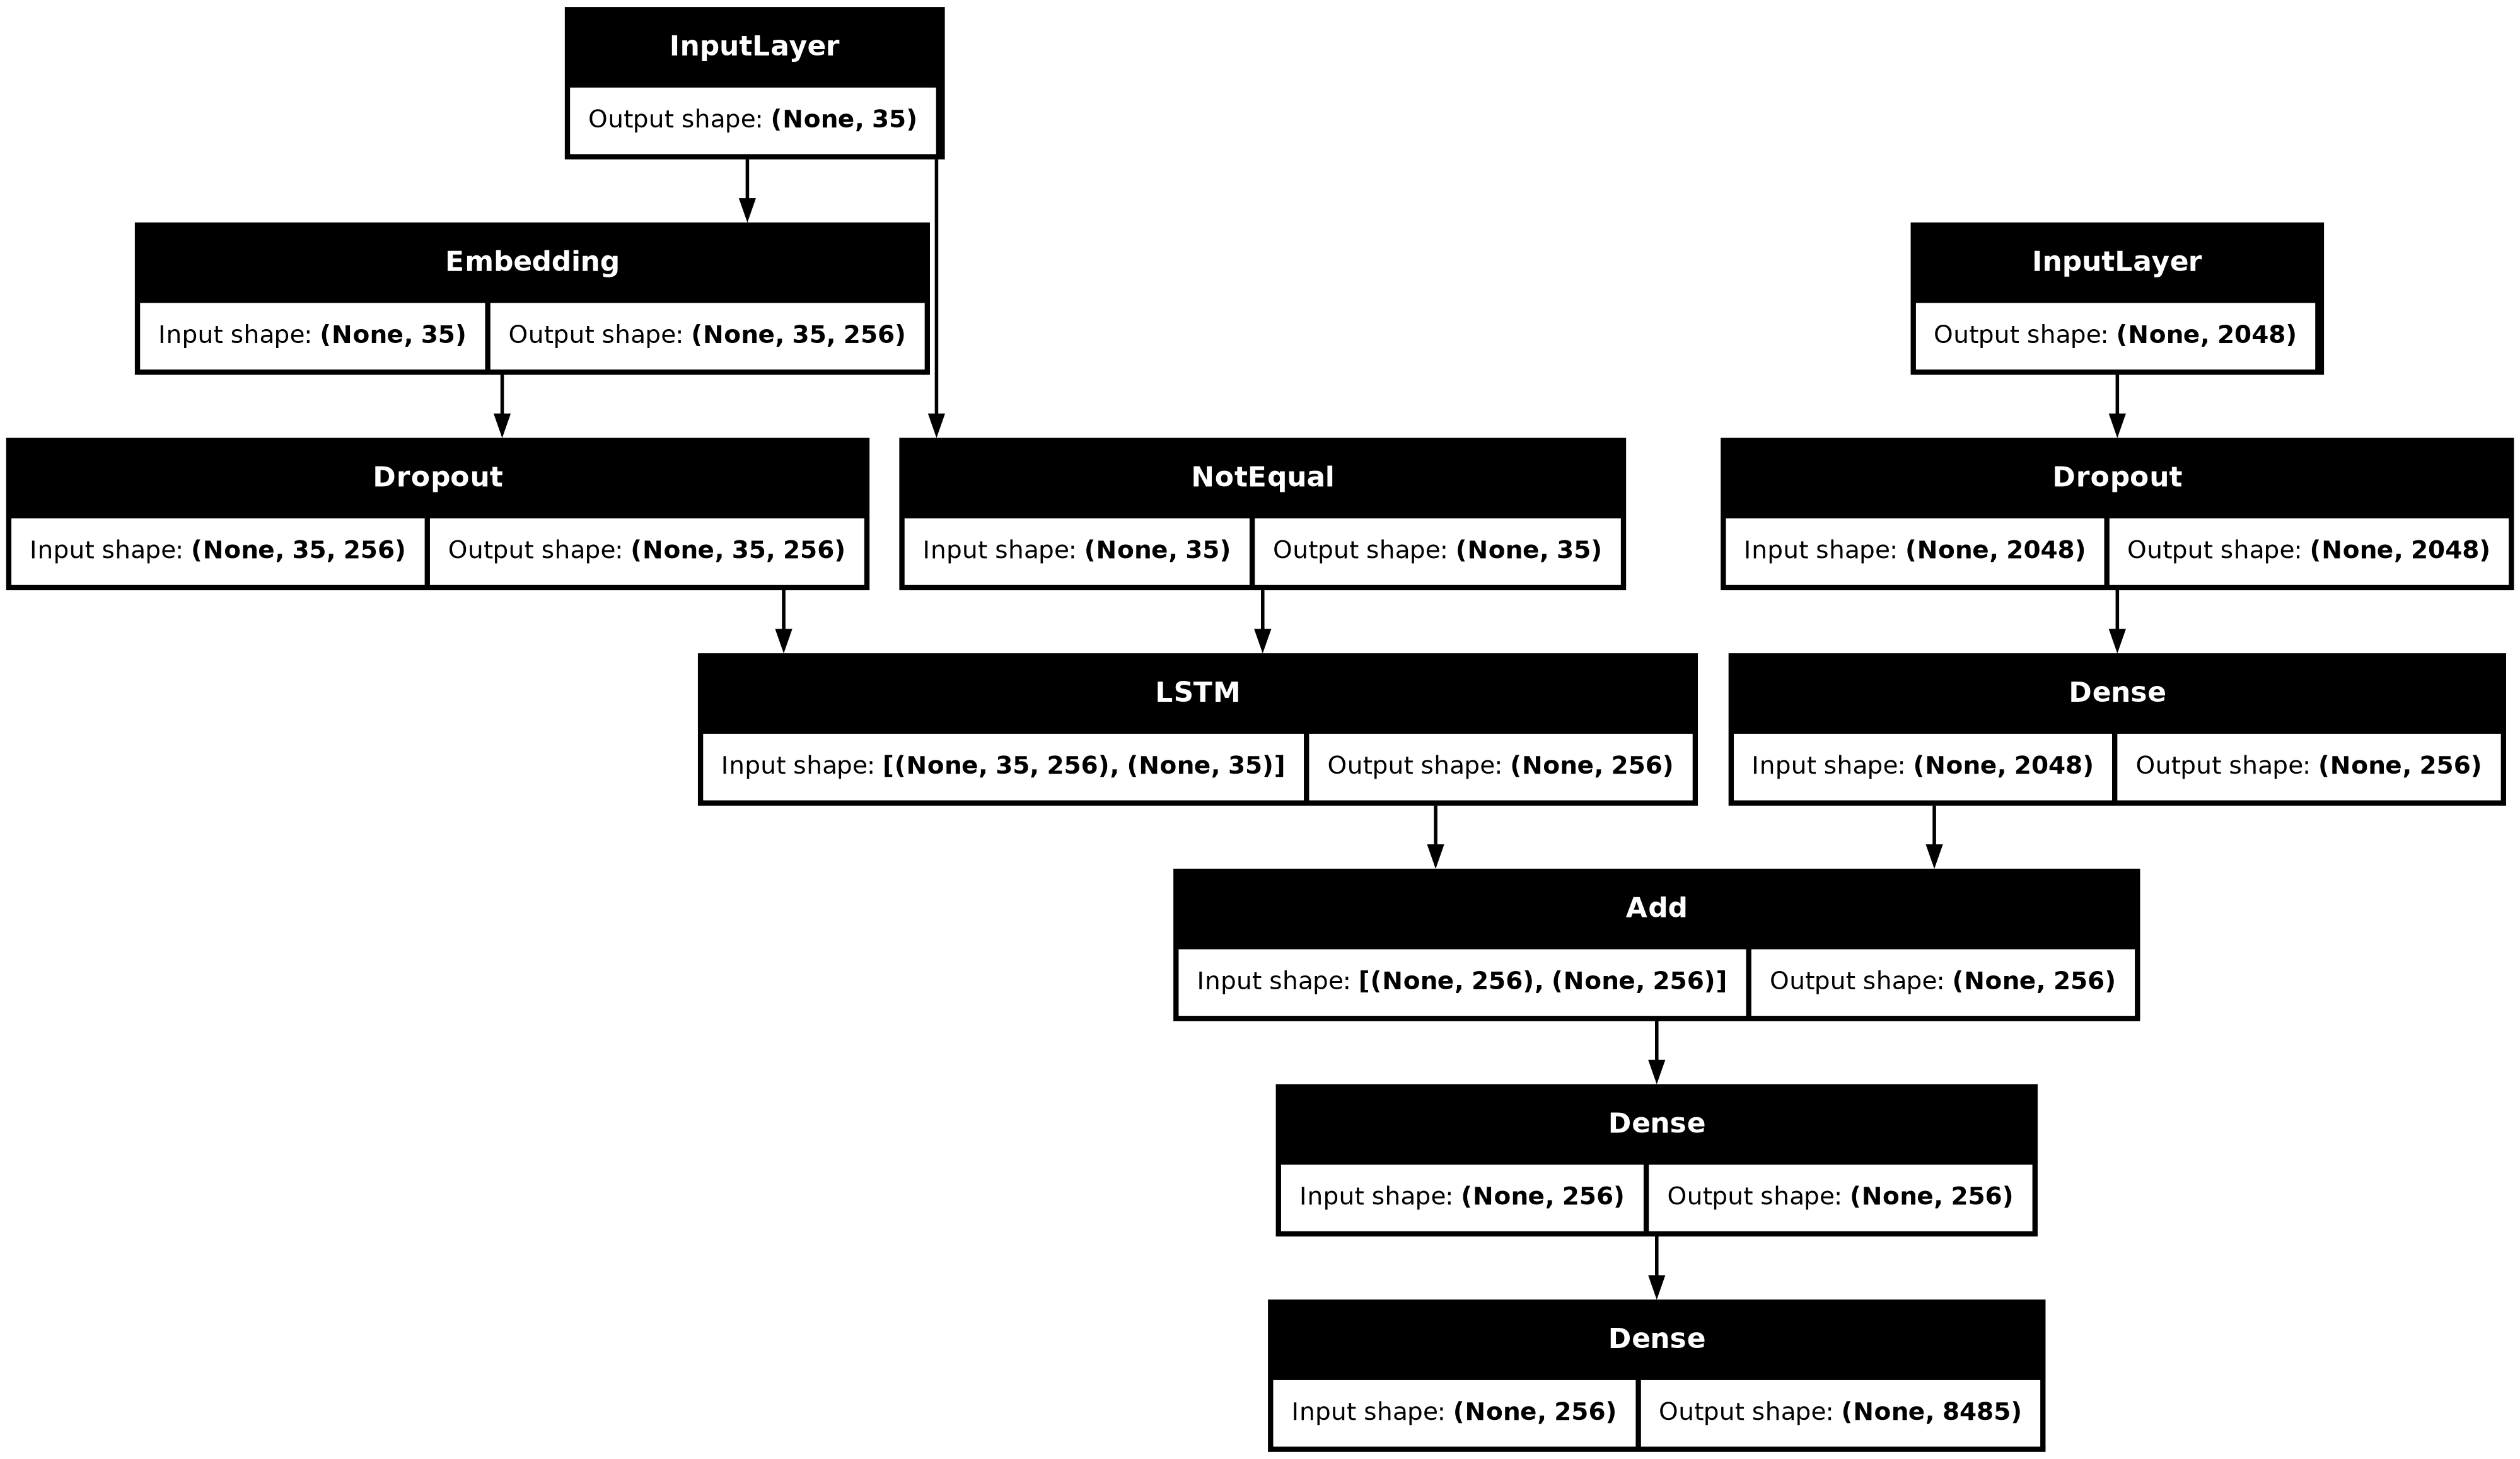

In [24]:
inputs1 = Input(shape=(2048,), name="image")
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

plot_model(model, show_shapes=True)

In [25]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 608s 3s/step - loss: 5.9740
227/227 ━━━━━━━━━━━━━━━━━━━━ 608s 3s/step - loss: 4.1498
227/227 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - loss: 3.6553
227/227 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - loss: 3.3980
227/227 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - loss: 3.2199
227/227 ━━━━━━━━━━━━━━━━━━━━ 601s 3s/step - loss: 3.0886
227/227 ━━━━━━━━━━━━━━━━━━━━ 590s 3s/step - loss: 2.9665
227/227 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - loss: 2.8729
227/227 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - loss: 2.7905
227/227 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - loss: 2.7120
227/227 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - loss: 2.6487
227/227 ━━━━━━━━━━━━━━━━━━━━ 581s 3s/step - loss: 2.5914
227/227 ━━━━━━━━━━━━━━━━━━━━ 582s 3s/step - loss: 2.5390
227/227 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - loss: 2.4907
227/227 ━━━━━━━━━━━━━━━━━━━━ 582s 3s/step - loss: 2.4436
227/227 ━━━━━━━━━━━━━━━━━━━━ 582s 3s/step - loss: 2.3989
227/227 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - loss: 2.3593
227/227 ━━━━━━━━━━━━━━━━━━━━ 58

In [26]:
model.save(WORKING_DIR+'/best_model.h5')

# **Generate Captions for the Image**

In [27]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [28]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length, padding='post')
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
    return in_text

# **Validation and Visualization**

In [29]:
actual, predicted = list(), list()

for key in tqdm(test):
    captions = mapping[key]
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    actual.append(actual_captions)
    predicted.append(y_pred)
    
    print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
    print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.421053
BLEU-2: 0.152944
BLEU-1: 0.458333
BLEU-2: 0.204124


/opt/conda/lib/python3.10/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


BLEU-1: 0.513514
BLEU-2: 0.274803
BLEU-1: 0.446429
BLEU-2: 0.207185
BLEU-1: 0.442857
BLEU-2: 0.202186
BLEU-1: 0.425000
BLEU-2: 0.185633
BLEU-1: 0.430233
BLEU-2: 0.180765
BLEU-1: 0.446809
BLEU-2: 0.190704
BLEU-1: 0.442308
BLEU-2: 0.180530
BLEU-1: 0.482759
BLEU-2: 0.223825
BLEU-1: 0.488000
BLEU-2: 0.226646
BLEU-1: 0.496454
BLEU-2: 0.232118
BLEU-1: 0.509934
BLEU-2: 0.235431
BLEU-1: 0.512195
BLEU-2: 0.240933
BLEU-1: 0.500000
BLEU-2: 0.229772
BLEU-1: 0.492063
BLEU-2: 0.232469
BLEU-1: 0.510101
BLEU-2: 0.243276
BLEU-1: 0.504673
BLEU-2: 0.238006
BLEU-1: 0.504425
BLEU-2: 0.241835
BLEU-1: 0.510460
BLEU-2: 0.250865
BLEU-1: 0.509960
BLEU-2: 0.249163
BLEU-1: 0.511450
BLEU-2: 0.252846
BLEU-1: 0.510870
BLEU-2: 0.254197
BLEU-1: 0.512367
BLEU-2: 0.251603
BLEU-1: 0.516892
BLEU-2: 0.258374
BLEU-1: 0.518033
BLEU-2: 0.262106
BLEU-1: 0.509317
BLEU-2: 0.252746
BLEU-1: 0.502976
BLEU-2: 0.249109
BLEU-1: 0.500000
BLEU-2: 0.248836
BLEU-1: 0.500000
BLEU-2: 0.252158
BLEU-1: 0.497396
BLEU-2: 0.251808
BLEU-1: 0.4974

In [30]:
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq black dog is playing with red and white dog on the ground endseq


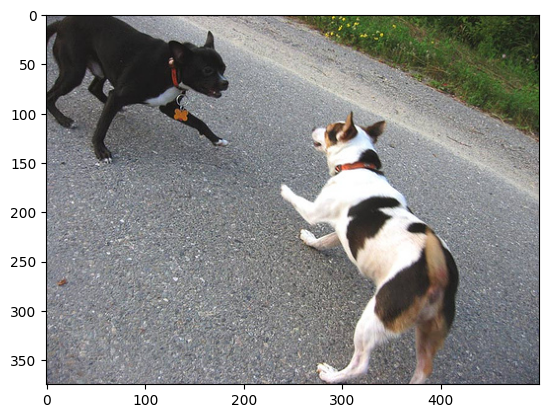

In [34]:
generate_caption("1001773457_577c3a7d70.jpg")